# COVID-19 Vaccination Progress Around The World


## Introduction


The data contains the following information:

1. Country - this is the country for which the vaccination information is provided;
2. Country ISO Code - ISO code for the country;
3. Date- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
4. Total number of vaccin ations - this is the absolute number of total immunizations in the country;
5. Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
6. Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
7. Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
8. Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
9. Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
10. Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
11. Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
12. Number of vaccinations per day - number of daily vaccination for that day and country;
13. Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
14. Vaccines used in the country - total number of vaccines used in the country (up to date);


Data Source - Kaggle;

Source website - https://www.kaggle.com/gpreda/covid-world-vaccination-progress/

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
!pip install plotly --upgrade --quiet

# DATA PREPERATION AND CLEANING

In [4]:
!pip install jovian opendatasets --upgrade --quiet

In [5]:
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress/' 

import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrnevil
Your Kaggle Key: ········


100%|██████████| 81.5k/81.5k [00:00<00:00, 18.6MB/s]

In [6]:
df=pd.read_csv("country_vaccinations.csv")

In [7]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3619 non-null   object 
 1   iso_code                             3343 non-null   object 
 2   date                                 3619 non-null   object 
 3   total_vaccinations                   2393 non-null   float64
 4   people_vaccinated                    1981 non-null   float64
 5   people_fully_vaccinated              1324 non-null   float64
 6   daily_vaccinations_raw               2019 non-null   float64
 7   daily_vaccinations                   3483 non-null   float64
 8   total_vaccinations_per_hundred       2393 non-null   float64
 9   people_vaccinated_per_hundred        1981 non-null   float64
 10  people_fully_vaccinated_per_hundred  1324 non-null   float64
 11  daily_vaccinations_per_million

In [9]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.393000e+03,1.981000e+03,1.324000e+03,2.019000e+03,3.483000e+03,2393.000000,1981.000000,1324.000000,3483.000000
mean,1.521028e+06,1.269657e+06,3.888861e+05,7.453608e+04,5.754796e+04,6.174785,5.243503,1.807364,2279.315820
std,5.038410e+06,4.148487e+06,1.476223e+06,2.065813e+05,1.784900e+05,11.530328,8.593589,4.604362,3788.432525
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.989300e+04,2.702000e+04,8.366000e+03,2.021000e+03,1.207500e+03,0.590000,0.610000,0.130000,349.000000
50%,1.917820e+05,1.694400e+05,3.395450e+04,1.164200e+04,6.081000e+03,2.420000,2.370000,0.720000,1039.000000
75%,7.689500e+05,6.324390e+05,1.947678e+05,5.658950e+04,2.922500e+04,5.570000,4.430000,1.512500,1978.000000
max,6.128950e+07,4.280960e+07,1.789567e+07,2.242472e+06,1.916190e+06,87.070000,49.750000,37.320000,30869.000000


In [10]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [11]:
#df.date = pd.to_datetime(df.date,infer_datetime_format=True,format='%Y-%b-%d')
df.fillna(0, inplace = True)
df['iso_code'].fillna('GBR', inplace=True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [12]:
df.drop(["source_name","source_website","people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred"],axis=1, inplace=True)


In [13]:
#df.drop(df.index[df['people_vaccinated'] == 0], inplace = True)

In [14]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.00,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,0.0,0.0,64.0,0.00,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,64.0,0.00,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,63.0,0.01,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,66.0,0.01,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...
3545,United States,USA,2021-02-16,55220364.0,39670551.0,1716311.0,16.51,"Moderna, Pfizer/BioNTech"
3546,United States,USA,2021-02-17,56281827.0,40268009.0,1644551.0,16.83,"Moderna, Pfizer/BioNTech"
3547,United States,USA,2021-02-18,57737767.0,41021049.0,1621071.0,17.26,"Moderna, Pfizer/BioNTech"
3548,United States,USA,2021-02-19,59585043.0,41977401.0,1596355.0,17.82,"Moderna, Pfizer/BioNTech"


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION


## RAW VISUALIZATION OF 5 COUNTRIES

We will initialize the Python packages. we will use for data ingestion, preparation and visualization. We will use mostly seaborn for visualization. Then we read the data file and aggregate the data on few fields (country, iso_code and vaccines - that is the vaccination scheme used in a certain country).

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rc('font', size=12)

## 1. INDIA

In [16]:
df_India = df[df["iso_code"] == 'IND'].copy()
df_India.drop(['people_vaccinated'], axis = 1, inplace = True)
df_India

,country,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,vaccines
1554,India,IND,2021-01-15,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca"
1555,India,IND,2021-01-16,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca"
1556,India,IND,2021-01-17,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca"
1557,India,IND,2021-01-18,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca"
1558,India,IND,2021-01-19,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca"
1559,India,IND,2021-01-20,806484.0,161297.0,0.06,"Covaxin, Oxford/AstraZeneca"
1560,India,IND,2021-01-21,1043534.0,173922.0,0.08,"Covaxin, Oxford/AstraZeneca"
1561,India,IND,2021-01-22,1390592.0,198656.0,0.10,"Covaxin, Oxford/AstraZeneca"
1562,India,IND,2021-01-23,1582201.0,198717.0,0.11,"Covaxin, Oxford/AstraZeneca"
1563,India,IND,2021-01-24,1615504.0,198743.0,0.12,"Covaxin, Oxford/AstraZeneca"


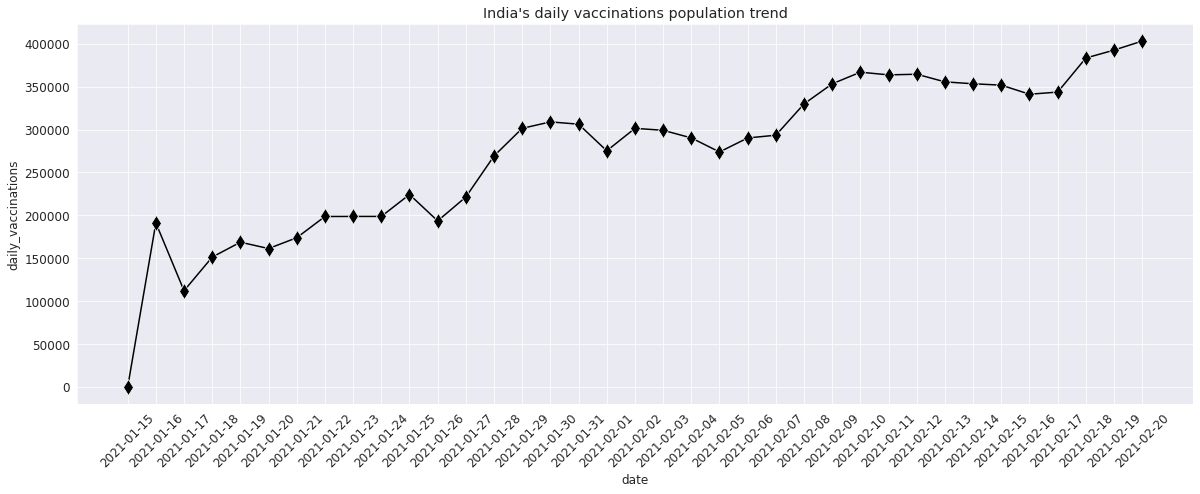

In [37]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_India,x="date",y="daily_vaccinations",marker='d',markersize= 12, color = 'k')

plt.title("India's daily vaccinations population trend")
plt.xticks(rotation=45)
plt.show();

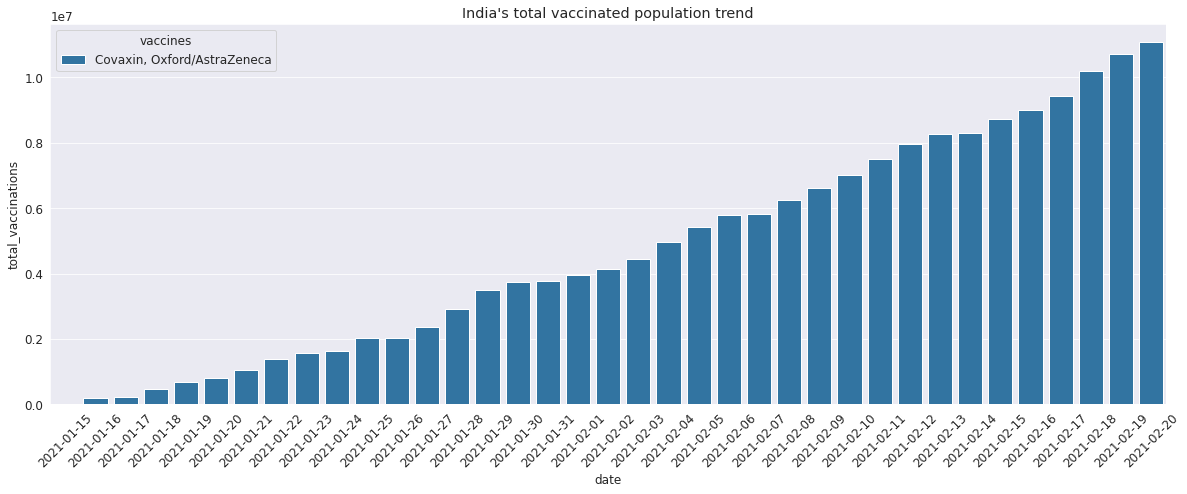

In [44]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_India, y="total_vaccinations",x="date",hue = 'vaccines')

plt.title("India's total vaccinated population trend")
plt.xticks(rotation=45);

## 2. CHINA

In [19]:
df_China = df[df["iso_code"] == 'CHN'].copy()

In [20]:
df_China.drop(['people_vaccinated'], axis = 1, inplace = True)
df_China

,country,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,vaccines
660,China,CHN,2020-12-15,1500000.0,0.0,0.10,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
661,China,CHN,2020-12-16,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
662,China,CHN,2020-12-17,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
663,China,CHN,2020-12-18,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
664,China,CHN,2020-12-19,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
665,China,CHN,2020-12-20,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
666,China,CHN,2020-12-21,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
667,China,CHN,2020-12-22,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
668,China,CHN,2020-12-23,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
669,China,CHN,2020-12-24,0.0,187500.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"


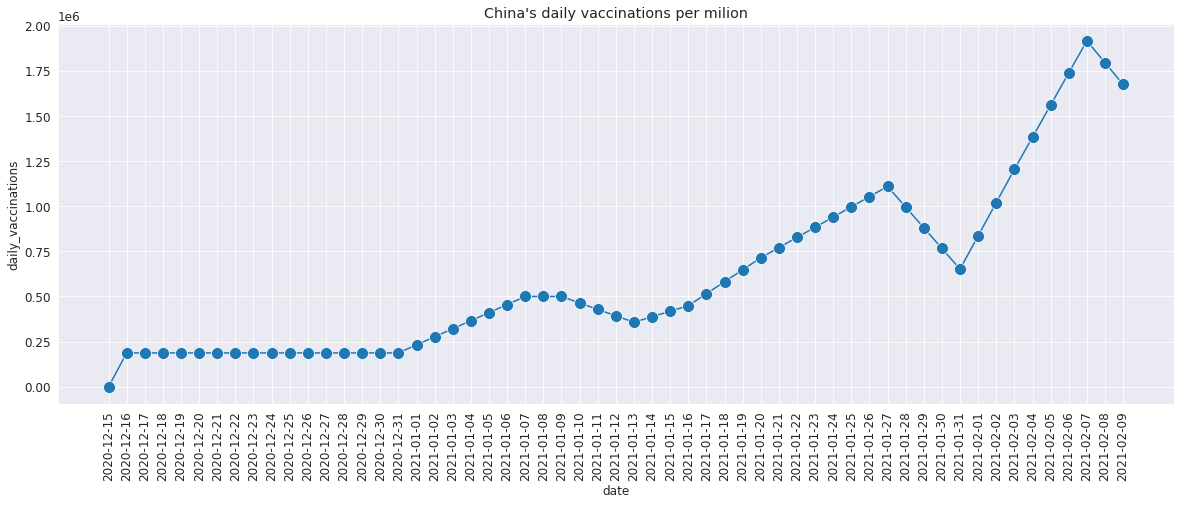

In [21]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_China,x="date",y="daily_vaccinations",marker='o',markersize =12);

plt.xticks(rotation=90);
plt.title("China's daily vaccinations per milion");

## 3. UNITED KINGDOM

In [22]:
df_UK= df[df["iso_code"] == 'GBR'].copy()
df_UK

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
3418,United Kingdom,GBR,2020-12-13,86265.0,86265.0,0.0,0.13,"Oxford/AstraZeneca, Pfizer/BioNTech"
3419,United Kingdom,GBR,2020-12-14,0.0,0.0,83999.0,0.00,"Oxford/AstraZeneca, Pfizer/BioNTech"
3420,United Kingdom,GBR,2020-12-15,0.0,0.0,83999.0,0.00,"Oxford/AstraZeneca, Pfizer/BioNTech"
3421,United Kingdom,GBR,2020-12-16,0.0,0.0,83999.0,0.00,"Oxford/AstraZeneca, Pfizer/BioNTech"
3422,United Kingdom,GBR,2020-12-17,0.0,0.0,83999.0,0.00,"Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
3482,United Kingdom,GBR,2021-02-15,16122272.0,15576107.0,422771.0,23.75,"Oxford/AstraZeneca, Pfizer/BioNTech"
3483,United Kingdom,GBR,2021-02-16,16499549.0,15940972.0,417385.0,24.30,"Oxford/AstraZeneca, Pfizer/BioNTech"
3484,United Kingdom,GBR,2021-02-17,16996806.0,16423082.0,423322.0,25.04,"Oxford/AstraZeneca, Pfizer/BioNTech"
3485,United Kingdom,GBR,2021-02-18,17465127.0,16875536.0,417544.0,25.73,"Oxford/AstraZeneca, Pfizer/BioNTech"


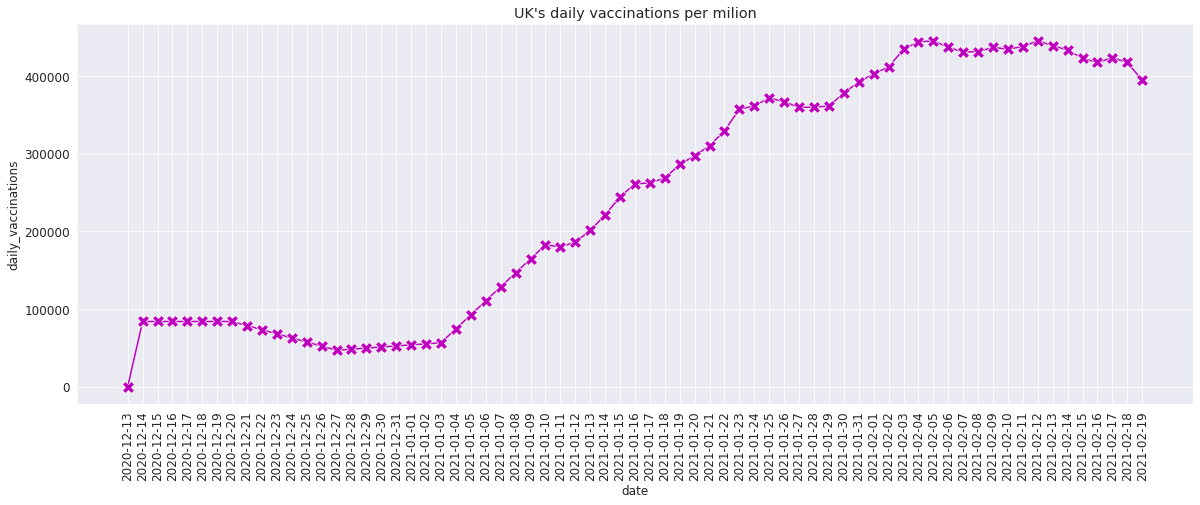

In [23]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_UK,x="date",y="daily_vaccinations",marker='X',markersize =12, color = 'm');

plt.xticks(rotation=90);
plt.title("UK's daily vaccinations per milion");

## 4. UNITED STATES of AMERICA

In [24]:
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
3487,United States,USA,2020-12-20,556208.0,556208.0,0.0,0.17,"Moderna, Pfizer/BioNTech"
3488,United States,USA,2020-12-21,614117.0,614117.0,57909.0,0.18,"Moderna, Pfizer/BioNTech"
3489,United States,USA,2020-12-22,0.0,0.0,127432.0,0.00,"Moderna, Pfizer/BioNTech"
3490,United States,USA,2020-12-23,1008025.0,1008025.0,150606.0,0.30,"Moderna, Pfizer/BioNTech"
3491,United States,USA,2020-12-24,0.0,0.0,191001.0,0.00,"Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
3545,United States,USA,2021-02-16,55220364.0,39670551.0,1716311.0,16.51,"Moderna, Pfizer/BioNTech"
3546,United States,USA,2021-02-17,56281827.0,40268009.0,1644551.0,16.83,"Moderna, Pfizer/BioNTech"
3547,United States,USA,2021-02-18,57737767.0,41021049.0,1621071.0,17.26,"Moderna, Pfizer/BioNTech"
3548,United States,USA,2021-02-19,59585043.0,41977401.0,1596355.0,17.82,"Moderna, Pfizer/BioNTech"


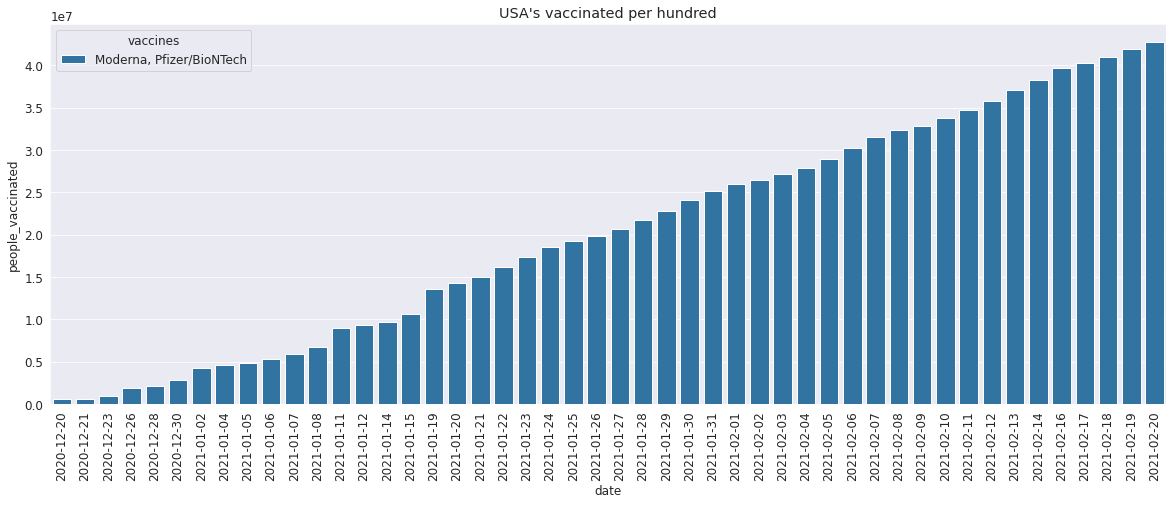

In [25]:
plt.figure(figsize=(20,7))

df_USA.drop(df_USA.index[df_USA['people_vaccinated'] == 0], inplace = True)

sns.barplot(data=df_USA,x="date",y="people_vaccinated", hue = 'vaccines')
plt.title("USA's vaccinated per hundred")

plt.xticks(rotation=90);

plt.show();

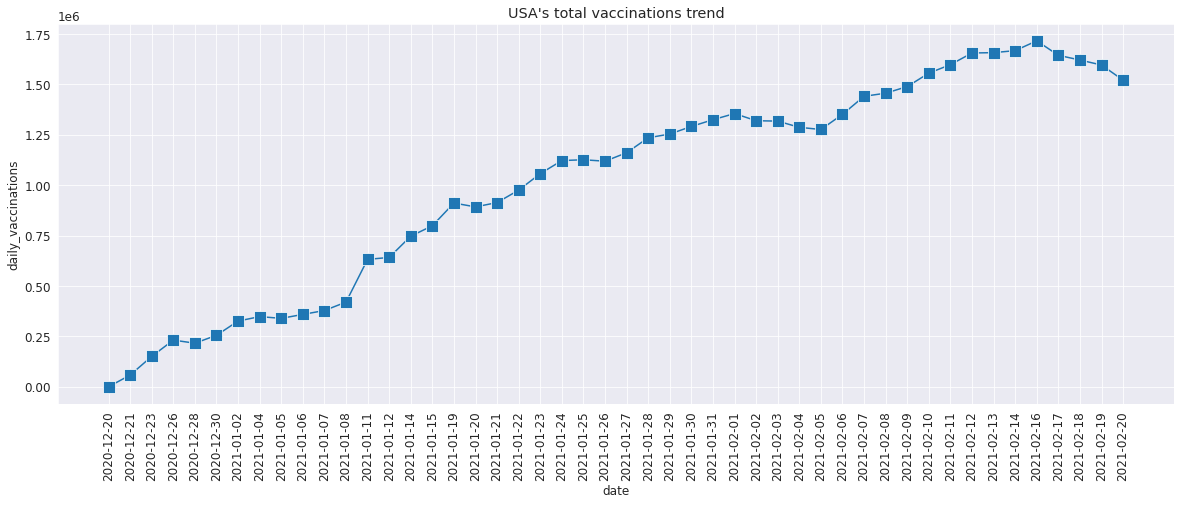

In [26]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_USA,x="date",y="daily_vaccinations",marker='s', markersize = 12);

plt.xticks(rotation=90);
plt.title("USA's total vaccinations trend");

# 5. RUSSIA

In [27]:
df_Russia = df[df["iso_code"] == 'RUS'].copy()
df_Russia

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
2764,Russia,RUS,2020-12-15,28500.0,28500.0,0.0,0.02,Sputnik V
2765,Russia,RUS,2020-12-16,0.0,0.0,3357.0,0.00,Sputnik V
2766,Russia,RUS,2020-12-17,0.0,0.0,3357.0,0.00,Sputnik V
2767,Russia,RUS,2020-12-18,0.0,0.0,3357.0,0.00,Sputnik V
2768,Russia,RUS,2020-12-19,0.0,0.0,3357.0,0.00,Sputnik V
2769,Russia,RUS,2020-12-20,0.0,0.0,3357.0,0.00,Sputnik V
2770,Russia,RUS,2020-12-21,0.0,0.0,3357.0,0.00,Sputnik V
2771,Russia,RUS,2020-12-22,52000.0,52000.0,3357.0,0.04,Sputnik V
2772,Russia,RUS,2020-12-23,0.0,0.0,12592.0,0.00,Sputnik V
2773,Russia,RUS,2020-12-24,0.0,0.0,21827.0,0.00,Sputnik V


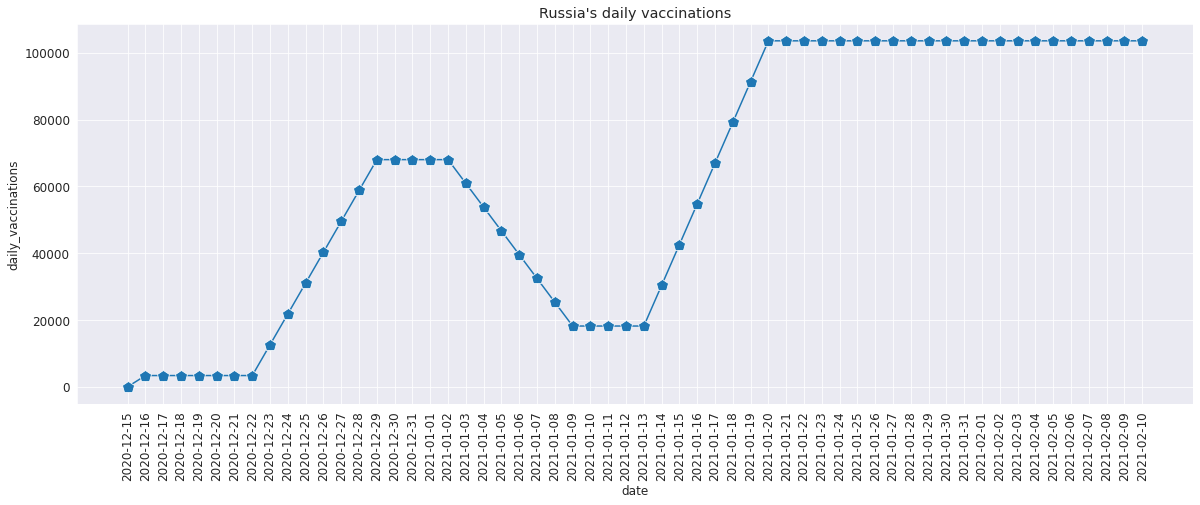

In [28]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_Russia,x="date",y="daily_vaccinations",marker='p', markersize = 12);

plt.xticks(rotation=90)
plt.title("Russia's daily vaccinations");

# ASKING AND ANSWERING QUESTIONS

# **1. Which country developed the vaccine the fastest?**

In [29]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines','total_vaccinations_per_hundred']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]



vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

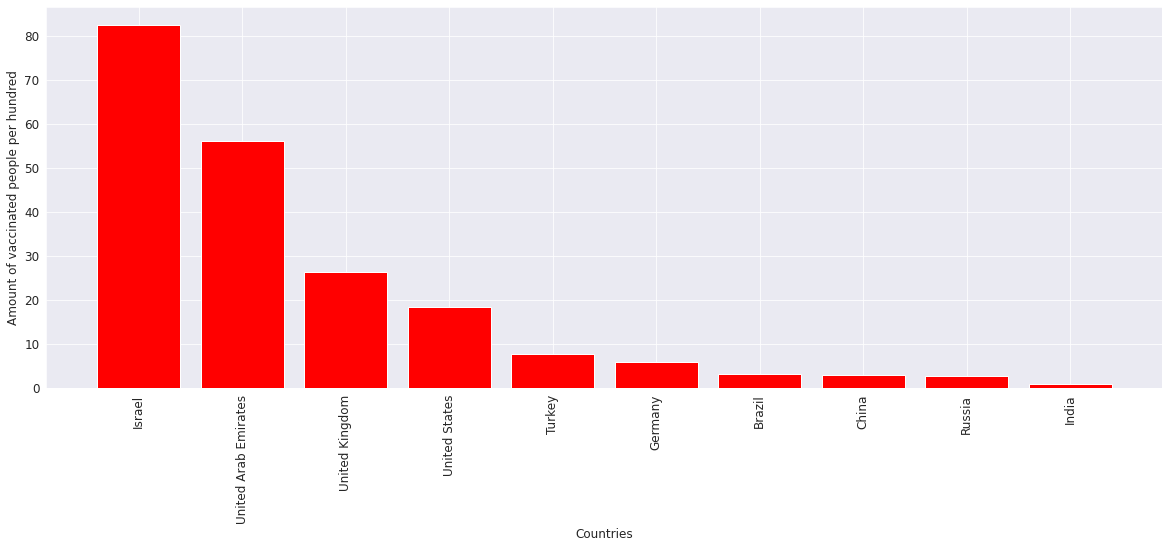

In [30]:
plt.figure(figsize=(20, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred, color = 'r')


plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

# **2. Which country has highest vaccinated people?**

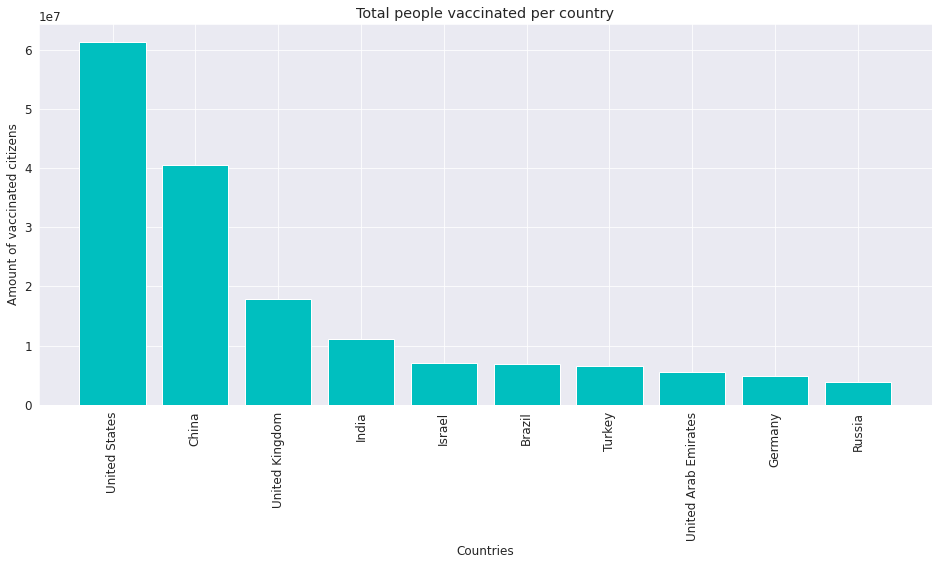

In [31]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations, color = 'c')

plt.title('Total people vaccinated per country')
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated citizens')
plt.xlabel('Countries')
plt.show();

# **3. Which categories of vaccines is offered?**

In [32]:
'''plt.figure(figsize=(20,7))
df_vaccines = df[["country","daily_vaccinations","vaccines"]].copy()
df_group = df_vaccines.groupby("vaccines")["daily_vaccinations"].sum()
df_group = df_group.sort_values(ascending=False).plot.bar()'''


'plt.figure(figsize=(20,7))\ndf_vaccines = df[["country","daily_vaccinations","vaccines"]].copy()\ndf_group = df_vaccines.groupby("vaccines")["daily_vaccinations"].sum()\ndf_group = df_group.sort_values(ascending=False).plot.bar()'

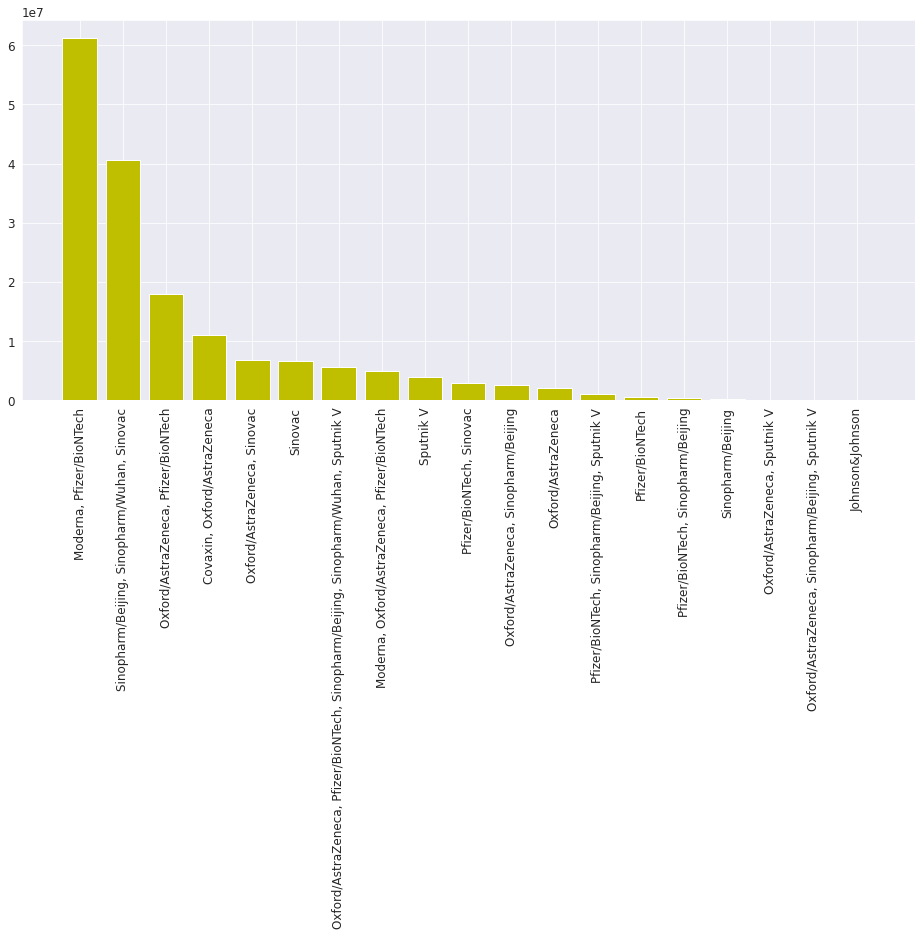

In [33]:
plt.figure(figsize=(16,7))
grp = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = df[grp].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='y')


#plt.bar(data = df_vaccines, x=vaccines, y = daily_vaccinations, hue = country)

plt.xticks(rotation=90);

# 4. Which country is using what vaccine?

In [45]:
fig = px.choropleth(df, locations="iso_code",
                    color="vaccines",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title= "Vaccines used by different countries")
fig.update_layout(showlegend=False)
fig.show()

# Inferences and Conclusion

From the above analysis and visualizations we can conclude that:
1) Many countries stated applying vaccines to their people by the end of 2020, whereas India started its vaccination programme from 15th Jan, 2021.

2) The rate of applying vaccines to the patients is highest in UK, whereas it is lowest in India. One of the reasons the rate of vaccine reaching people is low could be because **India is a developing country**.

3) **Moderna, Pfizer/BioNTech** is the most popular vaccine used worldwide, since it has almost negligible side effects (known till date). Also India uses **Covaxin, Covishield** for vaccinating its subjects.

4) Maximum number of people vaccinated is highest in USA since USA is a developed nation as well as it has better health facalities than other developing nations.

From the above inferences it can be concluded that people from all the parts of the world are educating themselves and willingly taking the vaccines in most parts of the world. Also these vaccines have been proved effective against COVID-19 (till now). If the rate of people taking the vaccine continues to grow then all the countries can vaccinate their people before the end of this year. 

# References and Future Work

By using this dataset we can compare the number of deaths before people taking vaccines vs after taking vaccines to ckeck the effectiveness of each vaccine on each country.

Resources :

1) Dataset : https://www.kaggle.com/gpreda/covid-world-vaccination-progress

2) Jovian Course : https://www.zerotopandas.com

3) DateTime library documentation : https://docs.python.org/3/library/datetime.html

4) Matplotlib documentation : https://matplotlib.org/3.1.1/contents.html

5) Tutorialspoint : https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

6) Seaborn documentation : https://seaborn.pydata.org/introduction.html

7) Pandas documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.items.html

8) pie charts in matplotlib (w3schools) : https://www.w3schools.com/python/matplotlib_pie_charts.asp

### **I shall soon add the link to my medium blog, stay tuned!**

**Peace.**

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nevilsutaria-9/covid-19-vaccination-progress" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/nevilsutaria-9/covid-19-vaccination-progress


'https://jovian.ai/nevilsutaria-9/covid-19-vaccination-progress'